In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_treated.pkl'))
df.head()

/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,correcao_licao_casa,faz_licao_casa,pai_le,pretensao_futura,reprovacao,tempo_trabalho_domestico,possui_tv,possui_geladeira_freezer,pai_sabe_ler_escrever,frequenta_espetaculo_exposicao,...,escola_publica,inicio_estudos,gosta_estudar_disciplina,leitura_historia_quadrinhos,possui_geladeira,frequenta_cinema,possui_freezer,responsaveis_incentivam_comparecer_aulas,disciplina,desempenho_aluno_cat
6255,2.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,1.0,1.0,...,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,LP,1
8086,2.0,2.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,1.0,...,1,2.0,1.0,0.0,1.0,0.0,1.0,0.0,LP,2
8463,2.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1,1.0,1.0,1.0,NaN,1.0,NaN,1.0,MT,0
10602,2.0,2.0,1.0,0.0,1.0,1.0,NaN,NaN,1.0,NaN,...,1,1.0,1.0,2.0,NaN,2.0,NaN,1.0,LP,0
11128,2.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,1.0,1.0,...,1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,MT,1


In [3]:
# valores unicos para cada variável, menos as de exclude
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno',
       'quantidade_pessoas_domicilio', 'possui_freezer', 'possui_geladeira', 'possui_geladeira_freezer', 'possui_empregada_domestica_cinco_dias',
       'possui_automovel', 'possui_maquina_lavar_roupa', 'possui_casa_dormitorio', 'possui_radio', 'possui_videocassete_dvd']

for col in df.columns:
    if col not in exclude:
        print(f'{col}: {df[col].unique()}')

correcao_licao_casa: [ 2.  1. nan  0.]
faz_licao_casa: [ 2.  1.  0. nan]
pai_le: [ 0.  1. nan]
pretensao_futura: [ 2.  0.  3.  1. nan]
reprovacao: [ 0.  1.  2. nan]
tempo_trabalho_domestico: [ 3.  4.  1.  0.  2. nan]
possui_tv: [ 1.  2. nan  0.  3.  4.]
pai_sabe_ler_escrever: [ 1.  0. nan]
frequenta_espetaculo_exposicao: [ 1. nan  0.  2.]
leitura_revista_comportamento: [ 0.  1.  2. nan]
possui_computador: [ 1. nan  0.  2.  3.  4.]
responsaveis_conversam_escola: [ 1.  0. nan]
leitura_jornais: [ 0.  1.  2. nan]
responsaveis_incentivam_leitura: [ 1.  0. nan]
escolaridade_pai: [ 1.  0.  3.  2.  4. nan  5.]
frequenta_biblioteca: [ 0.  1. nan  2.]
evasao_escolar_ate_final_ano: [0 2 1 3]
leitura_revistas_geral: [ 0.  1.  2. nan]
responsaveis_incentivam_realizacao_licao_casa: [ 1.  0. nan]
mae_le: [ 1.  0. nan]
idade: [15 13 14 16 17 18 21 20 19]
responsaveis_incentivam_estudos: [ 1.  0. nan]
possui_trabalho: [ 0.  1. nan]
mae_sabe_ler_escrever: [ 1. nan  0.]
leitura_internet: [ 2.  1. nan  0.

# merging cols

<AxesSubplot: xlabel='leitura', ylabel='Count'>

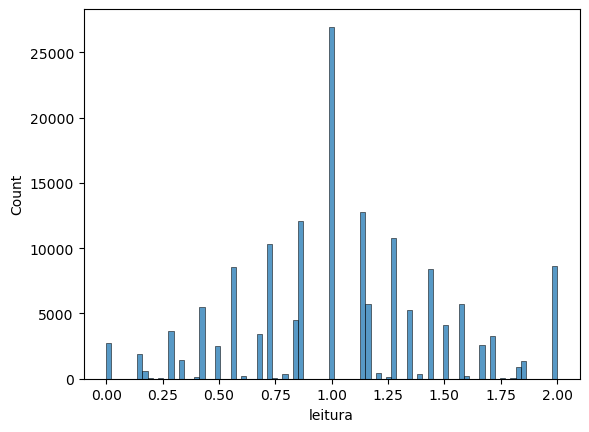

In [4]:
# feature engineering para as colunas de leitura
# a nova coluna 'leitura' terá a média dos valores para cada coluna de leitura_
# para cada aluno

columns_oi = [col for col in df.columns if 'leitura_' in col]
df['leitura'] = df[columns_oi].mean(axis=1)

df = df.drop(columns=columns_oi)
sns.histplot(df['leitura'])

<AxesSubplot: xlabel='frequenta_entretenimento', ylabel='Count'>

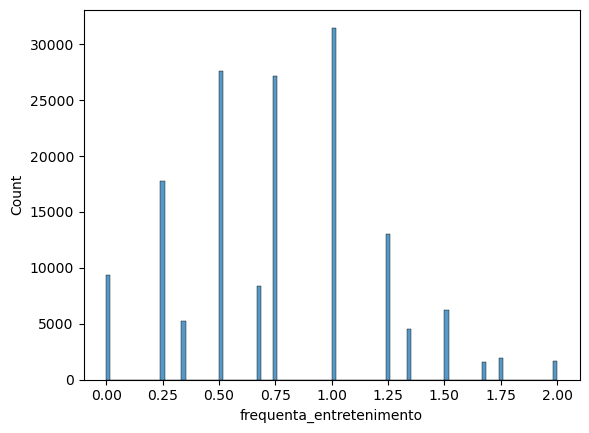

In [5]:
# colunas de 'frequenta_'
# criar uma nova coluna 'frequenta que conterá a média dos valores
# para cada aluno

columns_oi = [col for col in df.columns if 'frequenta_' in col]
df['frequenta_entretenimento'] = df[columns_oi].mean(axis=1)
df = df.drop(columns=columns_oi)
sns.histplot(df['frequenta_entretenimento'])

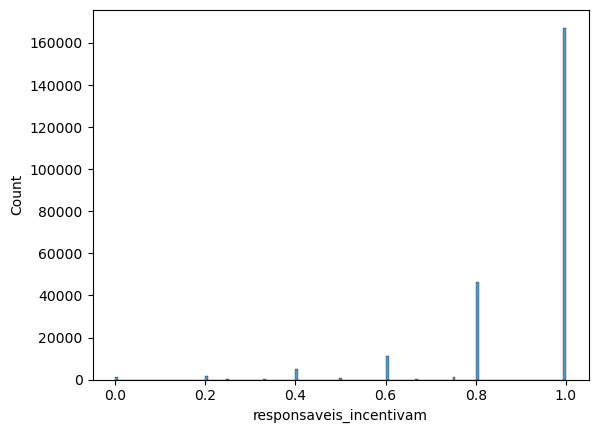

In [6]:
# responsaveis incentivam

columns_oi = [col for col in df.columns if 'responsaveis_incentivam' in col] + ['responsaveis_conversam_escola']

df['responsaveis_incentivam'] = df[columns_oi].mean(axis=1)
sns.histplot(df['responsaveis_incentivam'])

df = df.drop(columns=columns_oi)

<AxesSubplot: xlabel='escolaridade_pais', ylabel='Count'>

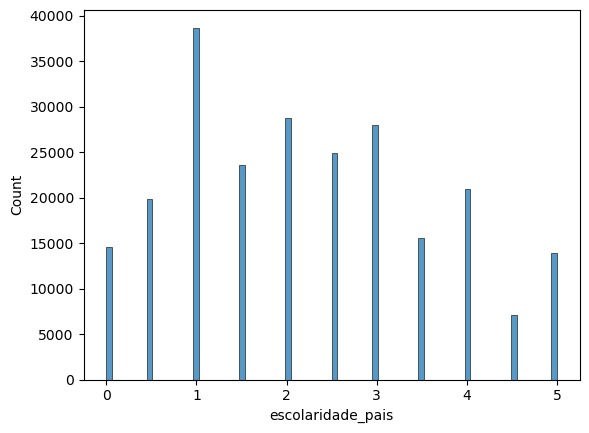

In [7]:
# escolaridade pai / mae
# Nunca estudou.	Não completou a 4.ª série/5.º ano.	Completou a 4.ª série/5.º ano, mas não completou a 8.ª série/9.º ano.	Completou a 8.ª série/9.º ano, mas não completou o Ensino Médio.	Completou o Ensino Médio, mas não completou a Faculdade.	Completou a Faculdade.
# 0	1	2	3	4	5

columns_oi = [col for col in df.columns if 'escolaridade_pai' in col] + [col for col in df.columns if 'escolaridade_mae' in col]

df['escolaridade_pais'] = df[columns_oi].mean(axis=1)
df = df.drop(columns=columns_oi)
sns.histplot(df['escolaridade_pais'])

<AxesSubplot: xlabel='leitura_pais', ylabel='Count'>

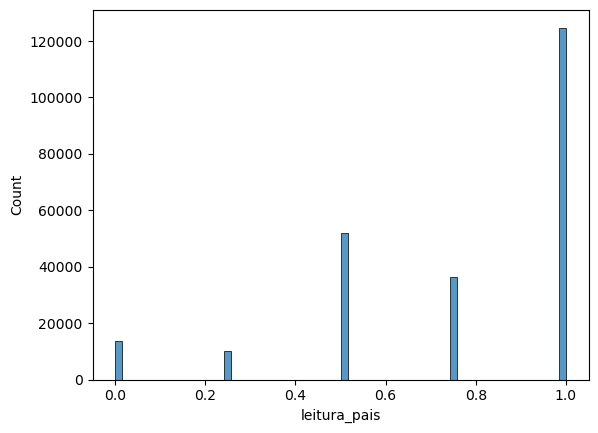

In [8]:
# leitura / escrita dos pais

df['leitura_mae'] = df[['mae_le', 'mae_sabe_ler_escrever']].mean(axis=1)
df['leitura_pai'] = df[['pai_le', 'pai_sabe_ler_escrever']].mean(axis=1)

df['leitura_pais'] = df[['leitura_mae', 'leitura_pai']].mean(axis=1)
df = df.drop(columns=['leitura_mae', 'leitura_pai'])
df = df.drop(columns=['pai_le', 'pai_sabe_ler_escrever', 'mae_le', 'mae_sabe_ler_escrever'])
sns.histplot(df['leitura_pais'])

In [9]:
# possui_computador
# Na sua casa tem computador?	Não tem.	Sim, um.	Sim, dois.	Sim, três.	Sim, quatro ou mais.

# separando em possui, ou não

columns_oi = ['possui_computador']
print(df[columns_oi].sum(axis=1).apply(lambda x: 1 if x > 0 else 0).value_counts())

df['possui_computador'] = df[columns_oi].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

1    148916
0     89815
Name: count, dtype: int64


In [10]:
# faz_licao_casa
# correcao_licao_casa
# utiliza_biblioteca_escola

# mesma lógica das anteriores
columns_oi = ['faz_licao_casa', 'correcao_licao_casa', 'utiliza_biblioteca_escola']

# media
df['estuda_regularmente'] = df[columns_oi].mean(axis=1)

df = df.drop(columns=columns_oi)
df['estuda_regularmente'].value_counts()

estuda_regularmente
2.000000    67334
1.333333    47937
1.666667    44522
1.000000    33574
1.500000    24683
0.666667     8898
0.000000     2952
0.333333     2701
0.500000     1668
Name: count, dtype: int64

<AxesSubplot: xlabel='tempo_extra', ylabel='Count'>

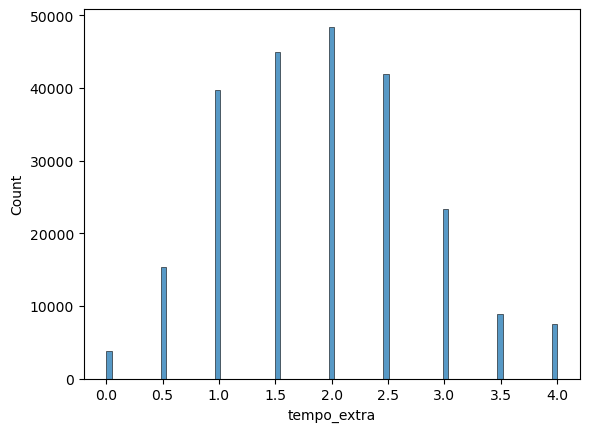

In [11]:
# questões tempo
# tempo que a pessoa gasta fazendo outra atividades (benéficas ou não)
# quando não está em dias de aula

columns_oi = [col for col in df.columns if 'tempo_' in col]

df['tempo_extra'] = df[columns_oi].mean(axis=1)
df = df.drop(columns=columns_oi)

sns.histplot(df['tempo_extra'])

In [12]:
for column in df.columns:
    if column not in exclude:
        print(f'{column}')

pretensao_futura
reprovacao
possui_tv
possui_computador
evasao_escolar_ate_final_ano
idade
possui_trabalho
responsaveis_comparecem_reuniao_pais
inicio_estudos
gosta_estudar_disciplina
desempenho_aluno_cat
leitura
frequenta_entretenimento
responsaveis_incentivam
escolaridade_pais
leitura_pais
estuda_regularmente
tempo_extra


In [13]:
save = False
if save:
    df.to_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_cleaned.pkl'))
    df.to_csv(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_cleaned.csv'), index=False)